# Datavisualizations of sequences

In [1]:
%matplotlib ipympl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot_gundp")

import sys,os
sys.path.insert(0, '../src')
from config import *


ModuleNotFoundError: No module named 'ipympl'

In [ ]:
df_seq = pd.read_csv(os.path.join(ROOT_PATH,DATA_DIR,"sequence_length_dataset.csv"))

In [3]:
df_seq

,idx,path,n_frames,sign,participant_id
0,0,train_landmark_files/26734/1000035562.parquet,23,blow,26734
1,1,train_landmark_files/28656/1000106739.parquet,11,wait,28656
2,2,train_landmark_files/16069/100015657.parquet,105,cloud,16069
3,3,train_landmark_files/25571/1000210073.parquet,12,bird,25571
4,4,train_landmark_files/62590/1000240708.parquet,18,owie,62590
...,...,...,...,...,...
94472,94472,train_landmark_files/53618/999786174.parquet,49,white,53618
94473,94473,train_landmark_files/26734/999799849.parquet,6,have,26734
94474,94474,train_landmark_files/25571/999833418.parquet,37,flower,25571
94475,94475,train_landmark_files/29302/999895257.parquet,34,room,29302


# Distributions of Number of frames per sign

In [12]:
df_countFrames = df_seq.groupby(by="sign").agg(dict({"n_frames":["mean","std"]}))
html = df_countFrames.to_html()

In [15]:
from IPython.display import display, HTML
display(HTML(df_countFrames.to_html()))

In [ ]:
sns.displot(y = "n_frames",data = df_seq,col = "sign",col_wrap=10,hue = "sign")

TV
after
airplane
all
alligator
animal
another
any
apple
arm
aunt
awake
backyard
bad
balloon
bath
because
bed
bedroom
bee
before
beside
better
bird
black
blow
blue
boat
book
boy
brother
brown
bug
bye
callonphone
can
car
carrot
cat
cereal
chair
cheek
child
chin
chocolate
clean
close
closet
cloud
clown
cow
cowboy
cry
cut
cute
dad
dance
dirty
dog
doll
donkey
down
drawer
drink
drop
dry
dryer
duck
ear
elephant
empty
every
eye
face
fall
farm
fast
feet
find
fine
finger
finish
fireman
first
fish
flag
flower
food
for
frenchfries
frog
garbage
gift
giraffe
girl
give
glasswindow
go
goose
grandma
grandpa
grass
green
gum
hair
happy
hat
hate
have
haveto
head
hear
helicopter
hello
hen
hesheit
hide
high
home
horse
hot
hungry
icecream
if
into
jacket
jeans
jump
kiss
kitty
lamp
later
like
lion
lips
listen
look
loud
mad
make
man
many
milk
minemy
mitten
mom
moon
morning
mouse
mouth
nap
napkin
night
no
noisy
nose
not
now
nuts
old
on
open
orange
outside
owie
owl
pajamas
pen
pencil
penny
person
pig
pizza
pleas

C:\Users\fs.GUNDP\AppData\Local\Temp\ipykernel_2936\77937138.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group, df_grp in df_seq.groupby(by=["sign"]):


# Cumuluative distribution of #Frames

(0.8, 1.0)

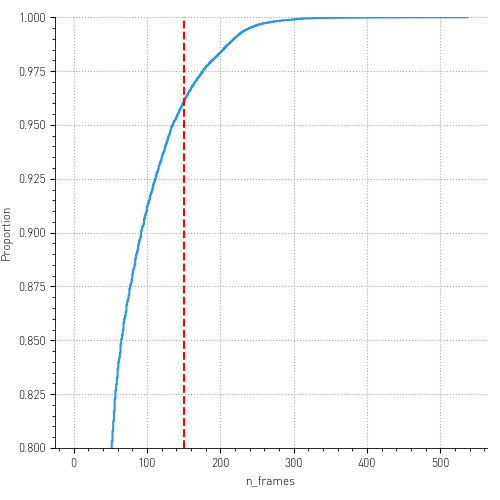

In [14]:
g = sns.displot(data = df_seq.n_frames,kind="ecdf")
g.axes[0][0].axvline(150,linestyle = "--",color = "red")
g.axes[0][0].set_ylim(.8,1)

# Count participant_ids

(0.8, 1.0)

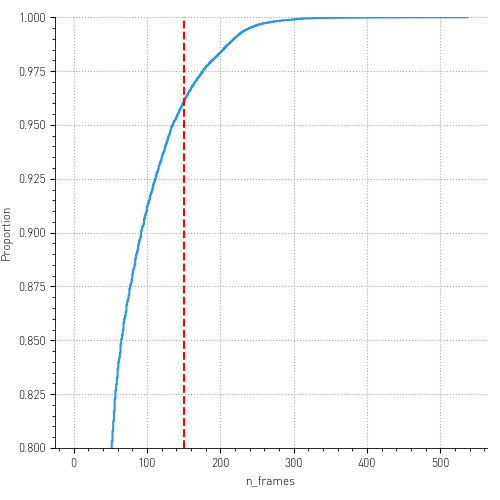

Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).


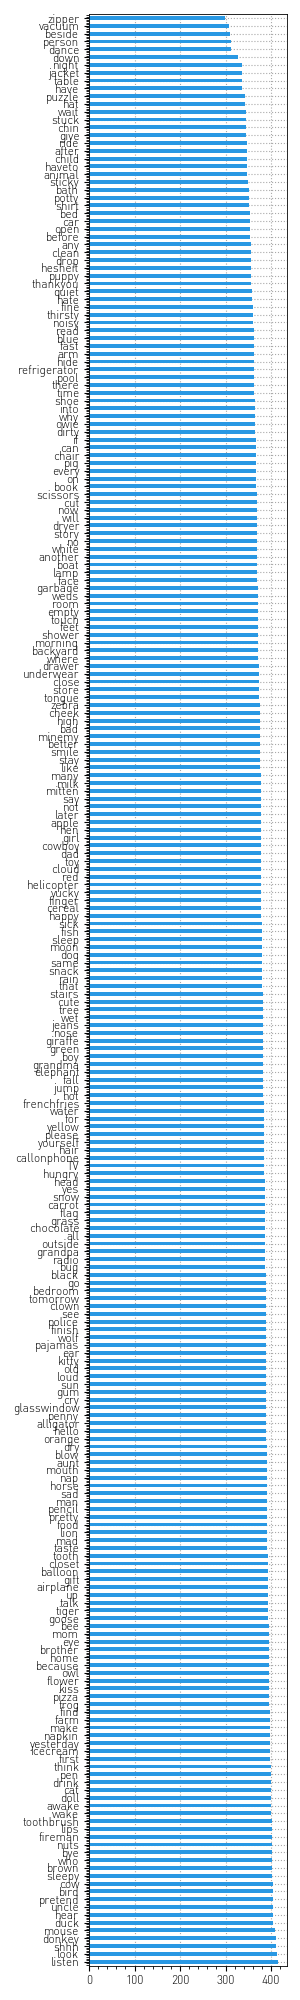

In [7]:
fig,ax = plt.subplots(1,figsize = (3,20))
df_seq.sign.value_counts().plot.barh()
plt.tight_layout()

In [8]:
df_summary = df_seq.groupby(by=["sign","participant_id"])["n_frames"].describe()


In [9]:
# from IPython.display import display, HTML

# display(HTML(df_summary.to_html()))